<a href="https://www.kaggle.com/code/kaiserkonok/classify-age-from-images?scriptVersionId=193917214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/faces-age-detection-dataset/faces/train.csv
/kaggle/input/faces-age-detection-dataset/faces/Train/19812.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/22735.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/16916.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/7981.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/22706.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/20513.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/12666.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/13288.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/20088.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/6234.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/1269.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/22288.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/24819.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/3863.jpg
/kaggle/input/faces-age-detection-dataset/faces/Tr

In [2]:
train_csv_path = "/kaggle/input/faces-age-detection-dataset/faces/train.csv"
train_images_path = "/kaggle/input/faces-age-detection-dataset/faces/Train"
extra_images_path = "/kaggle/input/faces-age-detection-dataset/faces_02/part3"

In [3]:
train_df = pd.read_csv(train_csv_path)

In [4]:
# Data Preprocessing
class_mapping = {'YOUNG': 0, 'MIDDLE': 1, 'OLD': 2}
train_df['Class'] = train_df['Class'].map(class_mapping)

In [5]:
# Image Preprocessing
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

In [6]:
# Load and preprocess images
train_images = []
train_labels = []

for idx, row in train_df.iterrows():
    image_path = os.path.join(train_images_path, row['ID'])
    image = load_and_preprocess_image(image_path)
    train_images.append(image)
    train_labels.append(row['Class'])

train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_labels = to_categorical(train_labels, num_classes=3)

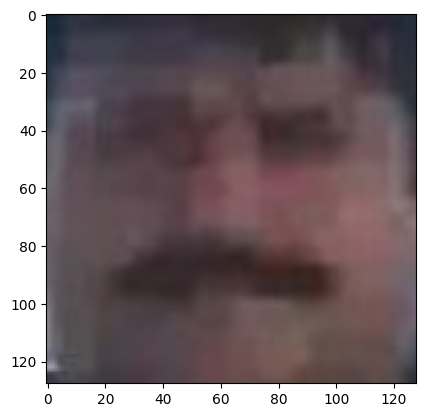

In [7]:
plt.imshow(train_images[5])

In [8]:
train_images.shape

(19906, 128, 128, 3)

In [9]:
train_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(264, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(3, activation='softmax'),
    ]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

In [12]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate a permutation of indices based on the number of samples
indices = np.random.permutation(18000)
indices = indices[:1200]

# Shuffle both train_images and train_labels using the same indices
train_images = train_images[indices]
train_labels = train_labels[indices]

In [13]:
indices

array([ 2574,  7496,  9210, ..., 17066, 13658, 13854])

In [14]:
train_images.shape

(1200, 128, 128, 3)

In [15]:
model.fit(train_images, train_labels, batch_size=64, epochs=20)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.4745 - loss: 1.2061
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.4921 - loss: 0.9537
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.5640 - loss: 0.9166
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.6071 - loss: 0.8644
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6316 - loss: 0.8271
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.6287 - loss: 0.7806
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.6797 - loss: 0.7378
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6663 - loss: 0.7370
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.6962 - loss: 0.6589
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.7484 - loss: 0.5716
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.7893 - loss: 0.5050
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8340 - lo